In [42]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import ast
from typing import List, Tuple

from collections import defaultdict
from typing import List                                                                                                         
from tqdm import tqdm

# 30 sec

In [ ]:
from Enum.EnergyRange import EnergyRange
from Enum.Flavour import Flavour

In [44]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [45]:
# csvs = {
#     # "TeV, 0.1612": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250324/model_20250323_134118/160258/predictions_epoch_003_val_loss_0.1612.csv",
#     # "TeV, last": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250324/model_20250323_134118/160258/predictions_epoch_last_val_loss_last.csv",
#     # "PeV, 0.1567": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250324/model_20250323_134422/160024/predictions_epoch_059_val_loss_0.1567.csv",
#     # "PeV, 0.1545": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250324/model_20250323_134422/160024/predictions_epoch_079_val_loss_0.1545.csv",
#     # "PeV, last": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250324/model_20250323_134422/160024/predictions_epoch_last_val_loss_last.csv",
#     # r"E$\in$(10TeV,1PeV), train(contain), val(250m), val_loss(0.1577)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250325/model_20250324_232809/101750/predictions_epoch_004_val_loss_0.1577.csv",
#     # r"E$\in$(1PeV,100PeV), train(contain), val(250m), val_loss(0.1542)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250325/model_20250324_201401/101450/predictions_epoch_010_val_loss_0.1542.csv",
#     r"40, E$\in$(10TeV,1PeV), train(0m), val_loss(0.1596), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250326/model_20250325_131358/104357/predictions_epoch_007_val_loss_0.1596.csv",
#     r"40, E$\in$(1PeV,100PeV), train(0m), val_loss(0.1604), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250326/model_20250325_105236/104153/predictions_epoch_011_val_loss_0.1604.csv",
#     r"40, E$\in$(10TeV,1PeV), train(0m), val_loss(0.1596), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250326/model_20250325_131358/112240/predictions_epoch_007_val_loss_0.1596.csv",
#     r"40, E$\in$(1PeV,100PeV), train(0m), val_loss(0.1604), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250326/model_20250325_105236/112353/predictions_epoch_011_val_loss_0.1604.csv",
    
#     }


In [46]:
csvs_high = {
    r"40, E$\in$(1PeV,100PeV), train(0m), val_loss(0.1604), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_105236/115950/predictions_epoch_011_val_loss_0.1604.csv",
    r"40, E$\in$(1PeV,100PeV), train(0m), val_loss(0.1604), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_105236/120040/predictions_epoch_011_val_loss_0.1604.csv",
    r"40, E$\in$(1PeV,100PeV), train(0m), val_loss(0.1604), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_105236/120145/predictions_epoch_011_val_loss_0.1604.csv",
    r"40, E$\in$(1PeV,100PeV), train(250m), val_loss(0.1576), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_123520/161203/predictions_epoch_015_val_loss_0.1576.csv",
    r"40, E$\in$(1PeV,100PeV), train(250m), val_loss(0.1576), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_123520/161435/predictions_epoch_015_val_loss_0.1576.csv",
    r"40, E$\in$(1PeV,100PeV), train(250m), val_loss(0.1576), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_123520/161532/predictions_epoch_015_val_loss_0.1576.csv",
    r"40, E$\in$(1PeV,100PeV), train(contain), val_loss(0.1604), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080433/124116/predictions_epoch_010_val_loss_0.1599.csv",
    r"40, E$\in$(1PeV,100PeV), train(contain), val_loss(0.1604), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080433/124157/predictions_epoch_010_val_loss_0.1599.csv",
    r"40, E$\in$(1PeV,100PeV), train(contain), val_loss(0.1604), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080433/124250/predictions_epoch_010_val_loss_0.1599.csv",
    }


In [47]:
csvs_medium = {
    r"40, E$\in$(10TeV,1PeV), train(0m), val_loss(0.1596), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_131358/124536/predictions_epoch_007_val_loss_0.1596.csv",
    r"40, E$\in$(10TeV,1PeV), train(0m), val_loss(0.1596), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_131358/124601/predictions_epoch_007_val_loss_0.1596.csv",
    r"40, E$\in$(10TeV,1PeV), train(0m), val_loss(0.1596), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250325_131358/124702/predictions_epoch_007_val_loss_0.1596.csv",
    r"40, E$\in$(10TeV,1PeV), train(250m), val_loss(0.1551), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_122518/161846/predictions_epoch_009_val_loss_0.1551.csv",
    r"40, E$\in$(10TeV,1PeV), train(250m), val_loss(0.1551), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_122518/161936/predictions_epoch_009_val_loss_0.1551.csv",
    r"40, E$\in$(10TeV,1PeV), train(250m), val_loss(0.1551), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_122518/162011/predictions_epoch_009_val_loss_0.1551.csv",
    r"40, E$\in$(10TeV,1PeV), train(contain), val_loss(0.1687), val(0m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080048/124812/predictions_epoch_004_val_loss_0.1687.csv",
    r"40, E$\in$(10TeV,1PeV), train(contain), val_loss(0.1687), val(250m)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080048/124827/predictions_epoch_004_val_loss_0.1687.csv",
    r"40, E$\in$(10TeV,1PeV), train(contain), val_loss(0.1687), val(contain)": "/groups/icecube/cyan/factory/IceCubeTransformer/predictions/20250327/model_20250327_080048/124935/predictions_epoch_004_val_loss_0.1687.csv",
    }

In [48]:
def enhance_probs(probs: np.ndarray) -> np.ndarray:
    epsilon = 1e-7
    p_e = probs * (1- 2*epsilon) + epsilon
    return np.log(p_e / (1-p_e))

In [49]:
def get_probs(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    df["probs"] = df["probs"].apply(ast.literal_eval)  # Convert string to list

    p_nu_e = np.array([p[0] for p in df[df["target_class"] == 0]['probs']])
    p_nu_mu = np.array([p[1] for p in df[df["target_class"] == 1]['probs']])
    p_nu_tau = np.array([p[2] for p in df[df["target_class"] == 2]['probs']])
    p_nu_e = enhance_probs(p_nu_e)
    p_nu_mu = enhance_probs(p_nu_mu)
    p_nu_tau = enhance_probs(p_nu_tau)
    return p_nu_e, p_nu_mu, p_nu_tau


In [50]:
def get_logits(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    df["logits"] = df["logits"].apply(ast.literal_eval)  # Convert string to list

    l_nu_e = np.array([l[0] for l in df[df["target_class"] == 0]['logits']])
    l_nu_mu = np.array([l[1] for l in df[df["target_class"] == 1]['logits']])
    l_nu_tau = np.array([l[2] for l in df[df["target_class"] == 2]['logits']])

    return l_nu_e, l_nu_mu, l_nu_tau

In [51]:
E = ("nu_e", r"\nu_e", 12)

In [52]:
def plot_prob_distribution(p_nu_e: List[float],
                           p_nu_mu: List[float], 
                           p_nu_tau: List[float], 
                           label: str):
    fig, ax = plt.subplots(figsize=(11, 7))
    Nbins, binwidth, bins, counts, bin_centers = getHistoParam(p_nu_e, binwidth=0.05)
    ax.hist(p_nu_e, bins=bins, histtype='step', label=fr"${Flavour.E.latex}$", color=getColour(2))
    ax.hist(p_nu_mu, bins=bins, histtype='step', label=fr"${Flavour.MU.latex}$", color=getColour(0))
    ax.hist(p_nu_tau, bins=bins, histtype='step', label=fr"${Flavour.TAU.latex}$", color=getColour(1))
    ax.set_xlabel("Probability")
    ax.set_ylabel("Counts")
    ax.set_title(f"softmax(logit) distribution of {label}")
    ax.legend()
    plt.show()
    

In [53]:
def plot_logit_distribution(l_nu_e: List[float], 
                            l_nu_mu: List[float], 
                            l_nu_tau: List[float], 
                            label: str,
                            manifier: Tuple[float, float] = None):
    fig, ax = plt.subplots(figsize=(13, 8))
    Nbins, binwidth, bins, counts, bin_centers = getHistoParam(l_nu_e, binwidth=0.005)
    ax.hist(l_nu_tau, bins=bins, histtype='step', label=fr"${Flavour.TAU.latex}$", color=getColour(1))
    ax.hist(l_nu_mu, bins=bins, histtype='step', label=fr"${Flavour.MU.latex}$", color=getColour(0))
    ax.hist(l_nu_e, bins=bins, histtype='step', label=fr"${Flavour.E.latex}$", color=getColour(2))
    ax.set_xlabel("Logit")
    ax.set_ylabel("Counts")
    ax.set_title(f"Logit of {label}")
    if manifier:
        ax.set_xlim(manifier)
    else:
        ax.set_xlim(-0.1, 1.0)
    
    d_e = {
        r'$\nu_e$': "",
        "N": len(l_nu_e),
        "max": np.max(l_nu_e),
        "min": np.min(l_nu_e),
        "mean": np.mean(l_nu_e),
        "median": np.median(l_nu_e),
        }
    d_mu = {
        r'$\nu_\mu$': "",
        "N": len(l_nu_mu),
        "max": np.max(l_nu_mu),
        "min": np.min(l_nu_mu),
        "mean": np.mean(l_nu_mu),
        "median": np.median(l_nu_mu),
        }
    d_tau = {
        r'$\nu_\tau$': "",
        "N": len(l_nu_tau),
        "max": np.max(l_nu_tau),
        "min": np.min(l_nu_tau),
        "mean": np.mean(l_nu_tau),
        "median": np.median(l_nu_tau),
        }
    add_text_to_ax(0.1, 0.95, nice_string_output(d_e), ax, fontsize=10)
    add_text_to_ax(0.1, 0.75, nice_string_output(d_mu), ax, fontsize=10)
    add_text_to_ax(0.1, 0.55, nice_string_output(d_tau), ax, fontsize=10)
        
    ax.legend()
    plt.show()

In [54]:
def run_plot(csv, id):
    df = pd.read_csv(csv)
    # p_nu_e, p_nu_mu, p_nu_tau = get_probs(df)
    # plot_prob_distribution(p_nu_e, p_nu_mu, p_nu_tau, id)
    l_nu_e, l_nu_mu, l_nu_tau = get_logits(df)
    plot_logit_distribution(l_nu_e, l_nu_mu, l_nu_tau, id)
    plot_logit_distribution(l_nu_e, l_nu_mu, l_nu_tau, id, manifier=(0.8, 1.0))

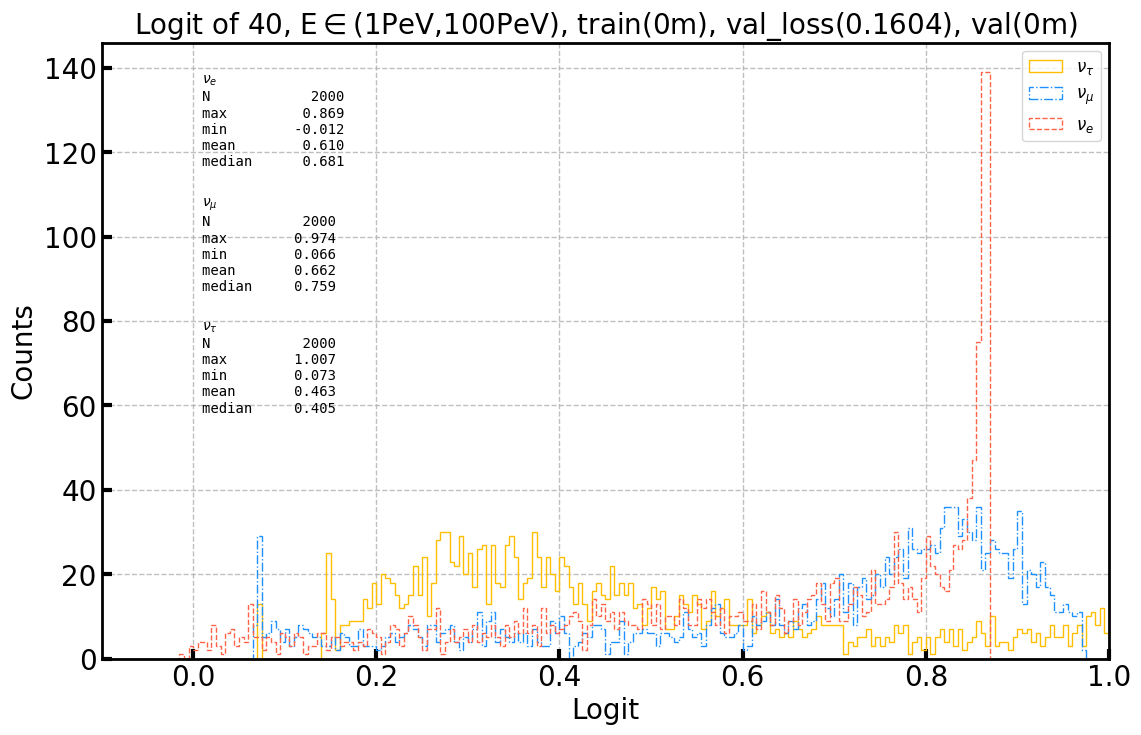

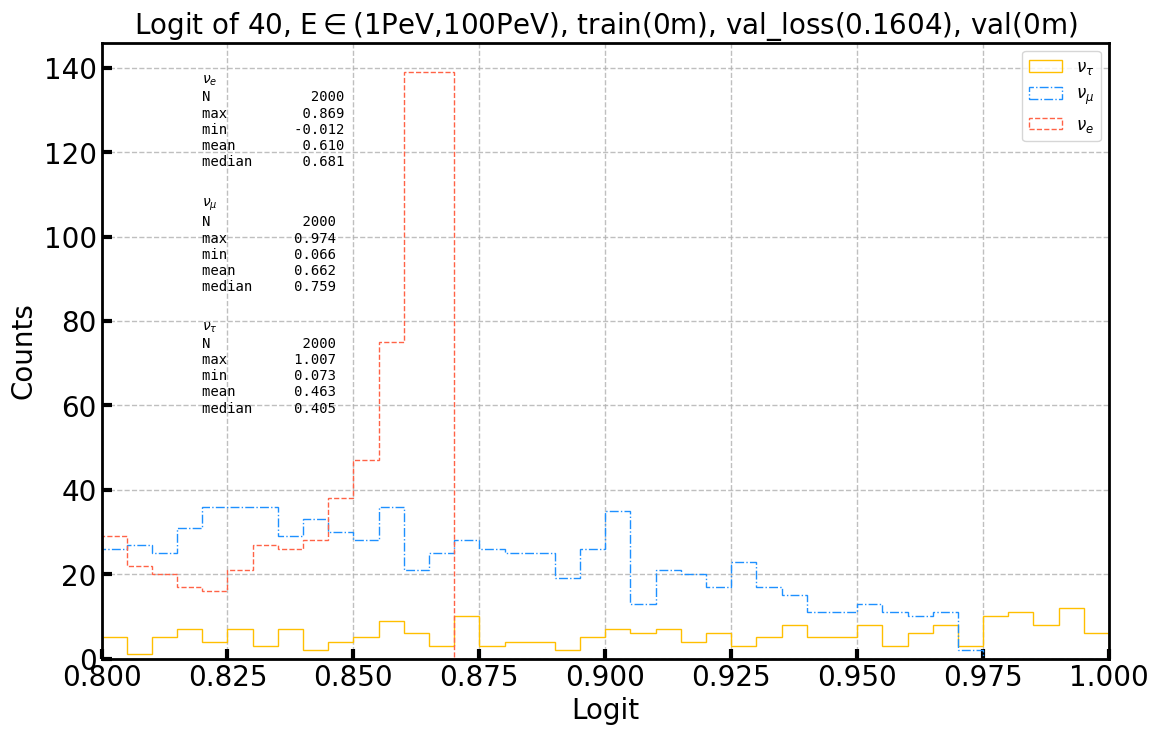

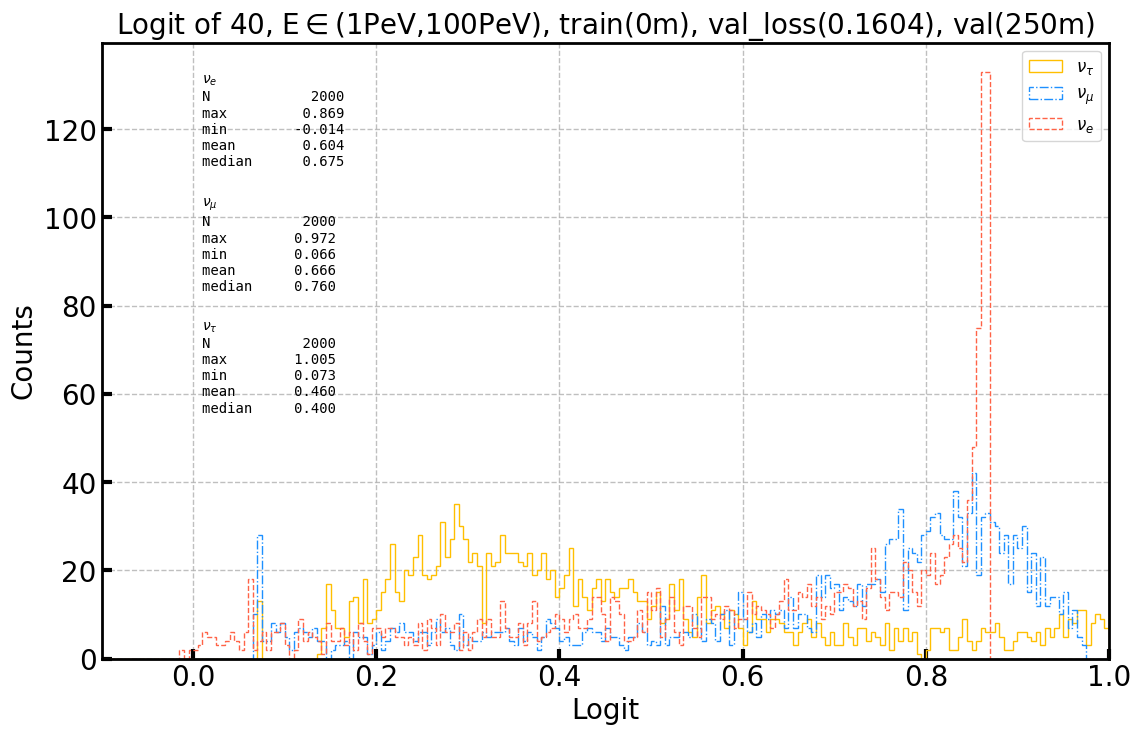

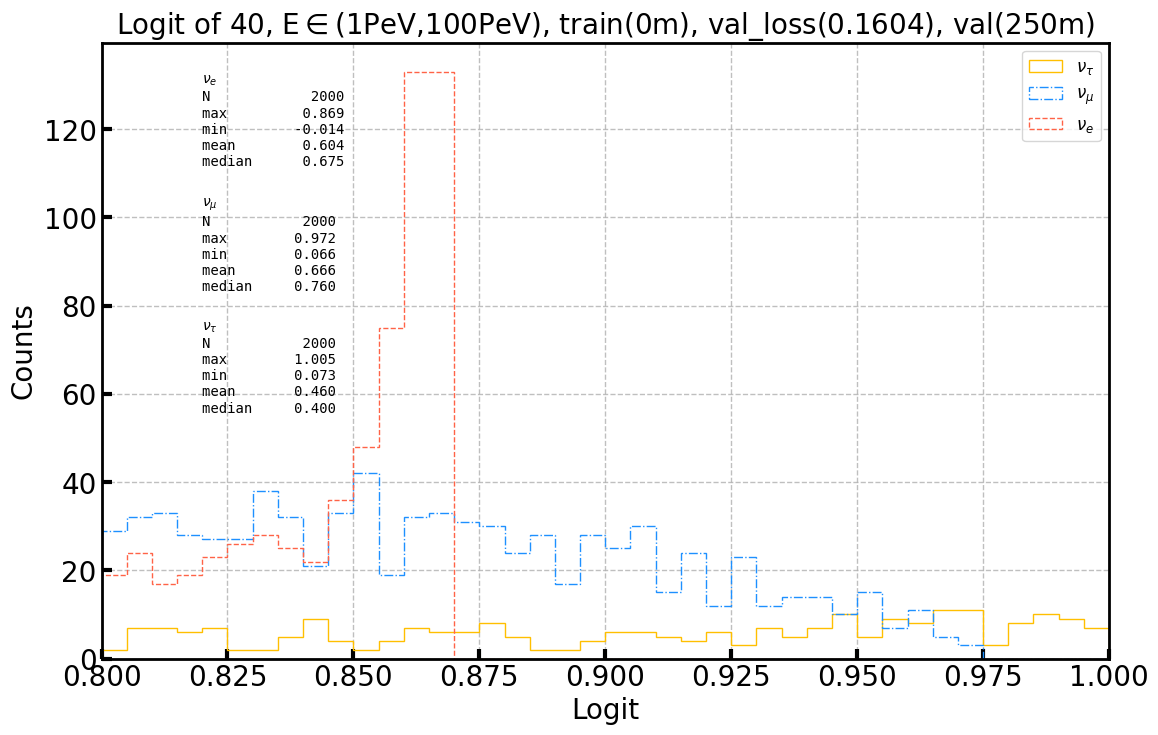

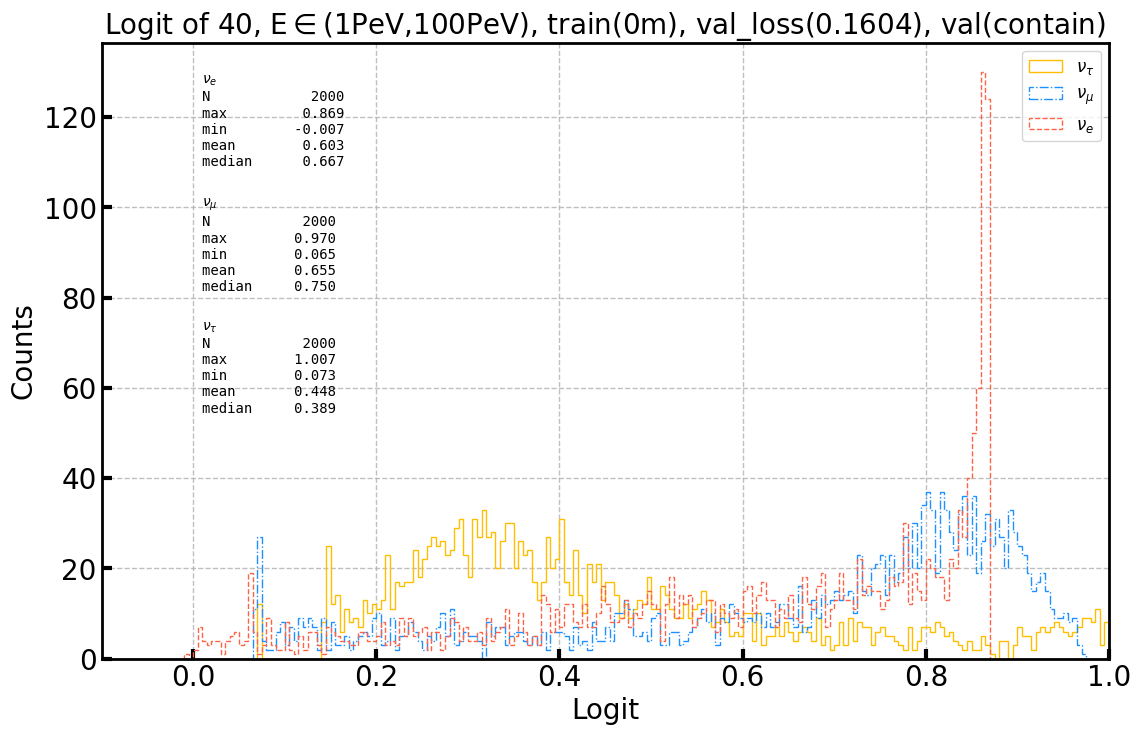

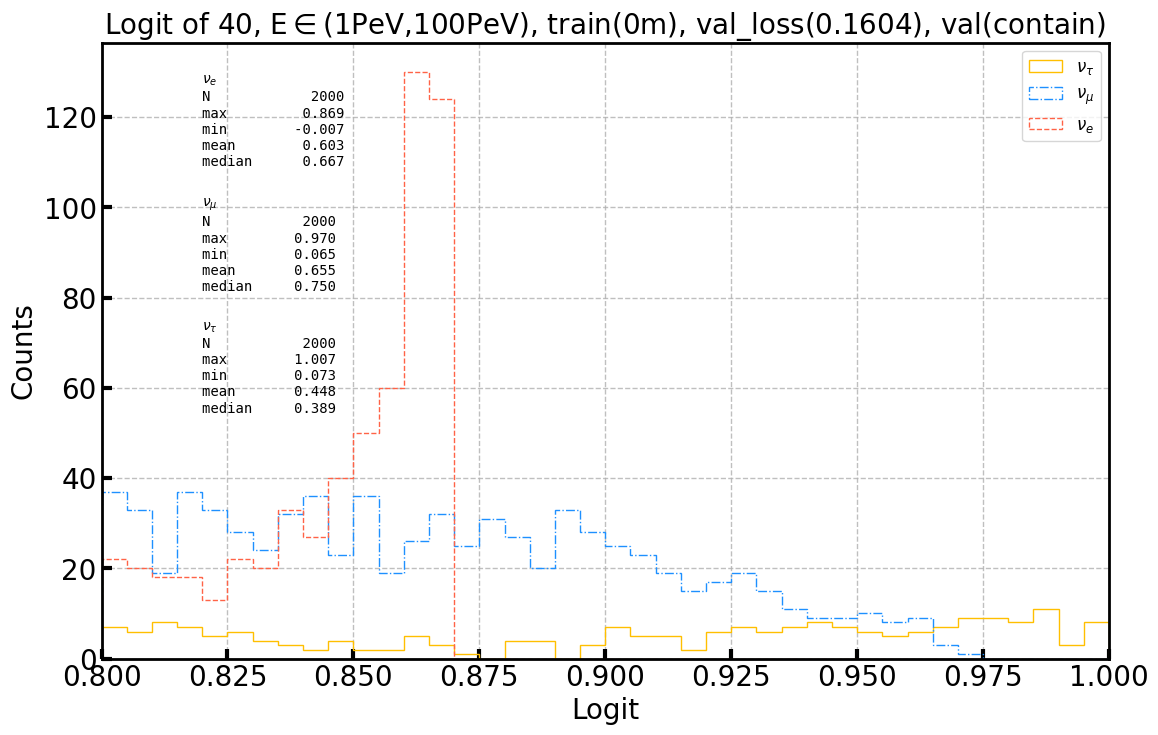

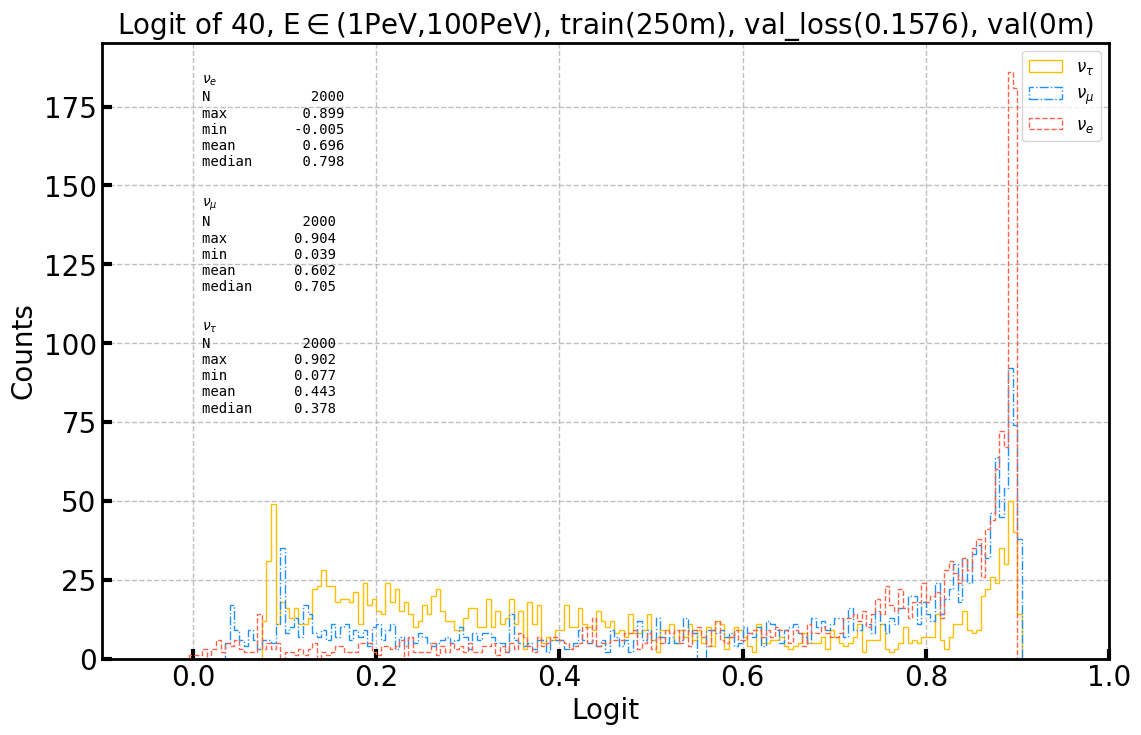

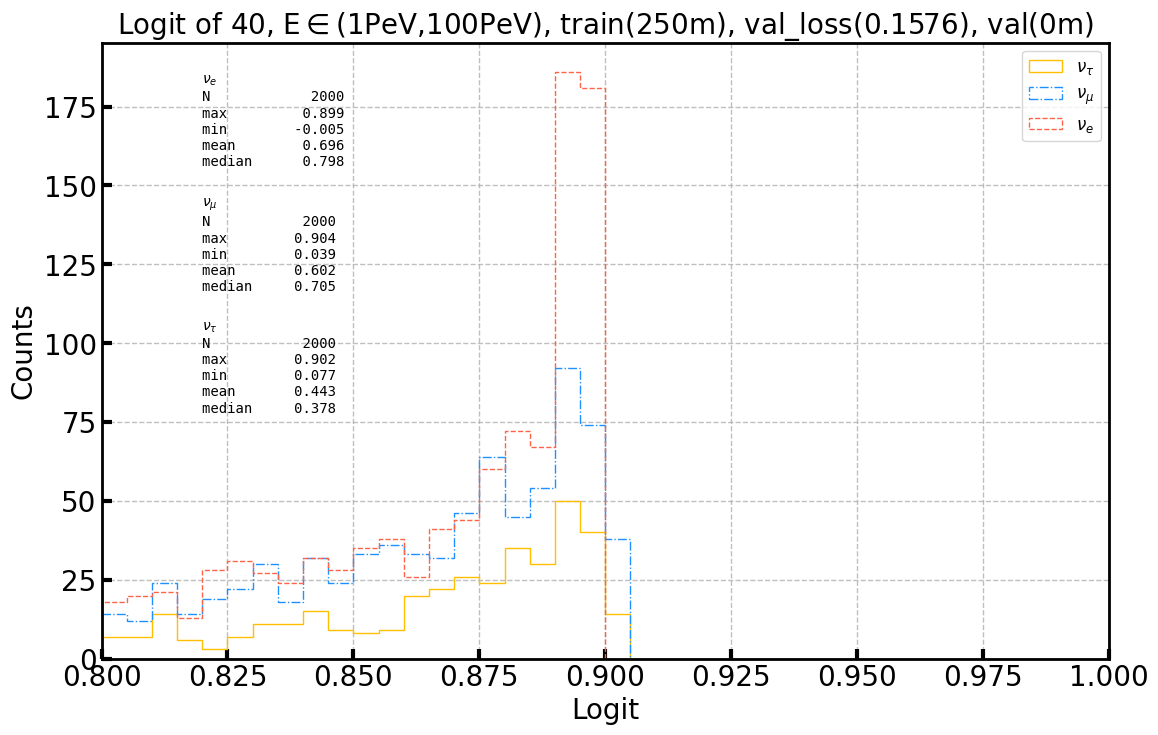

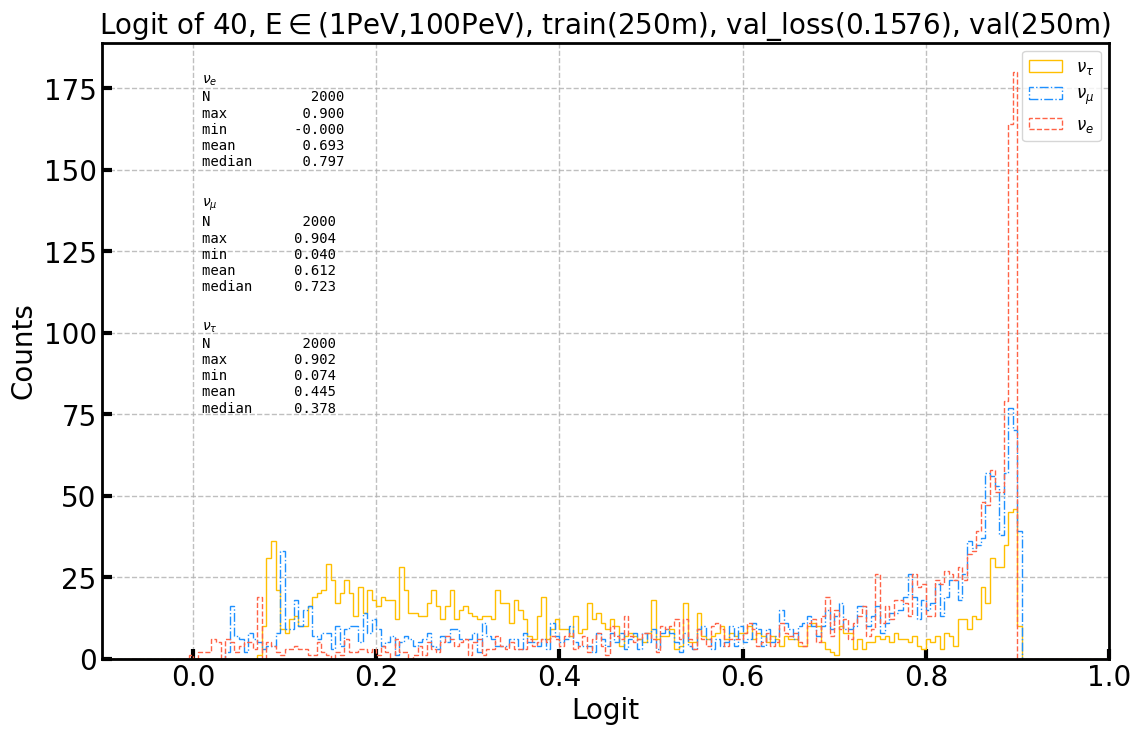

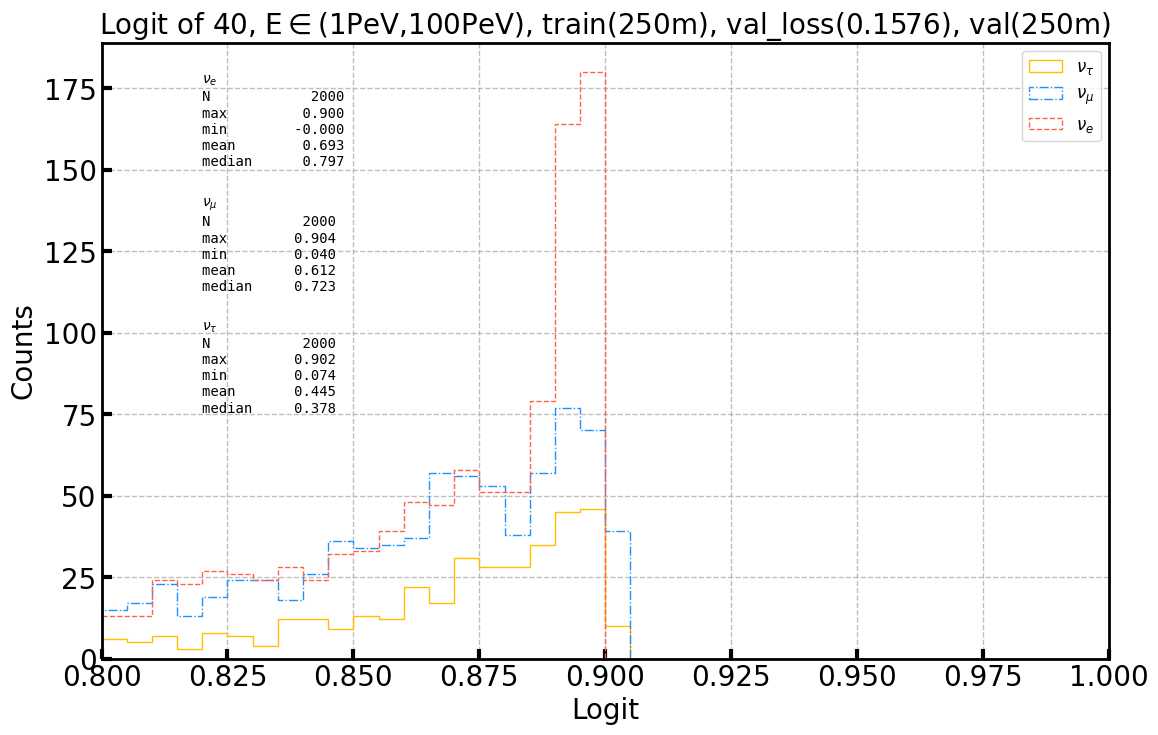

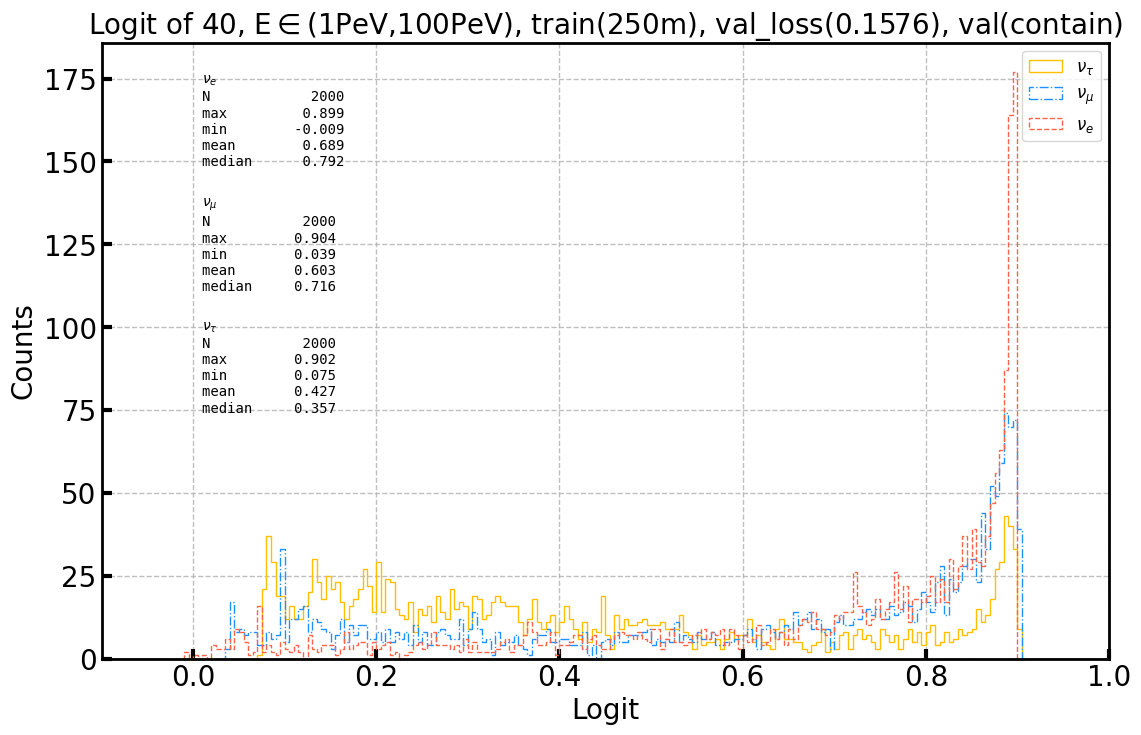

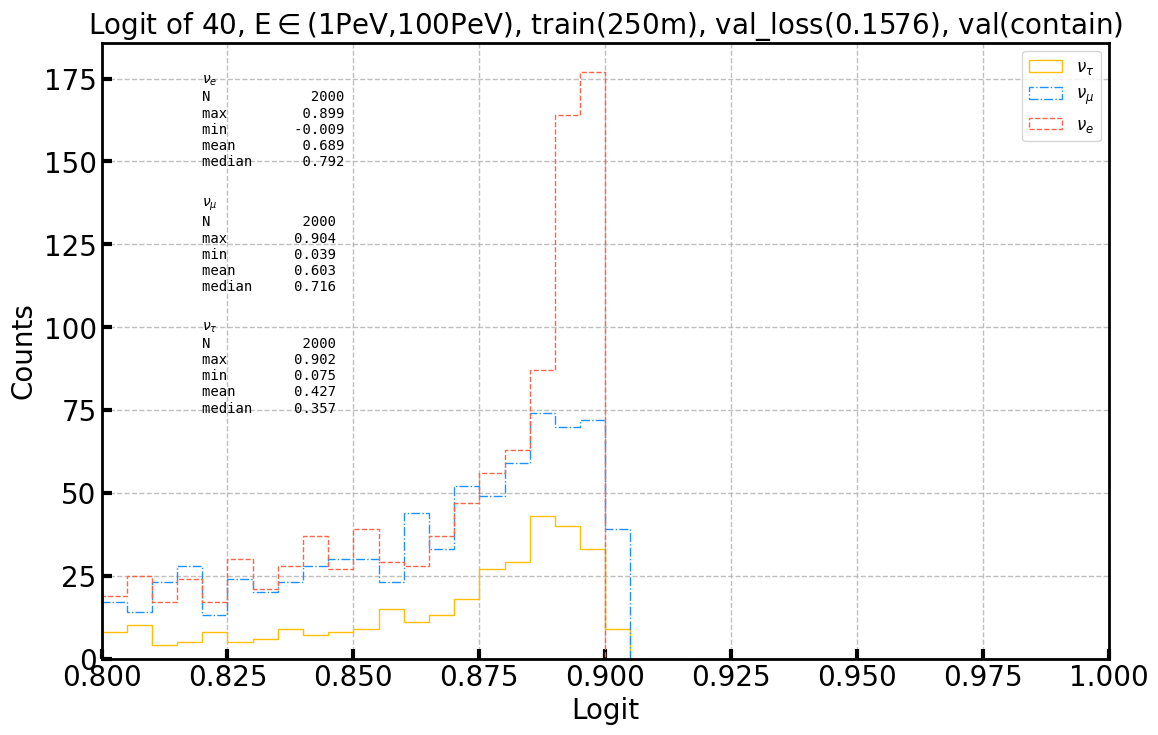

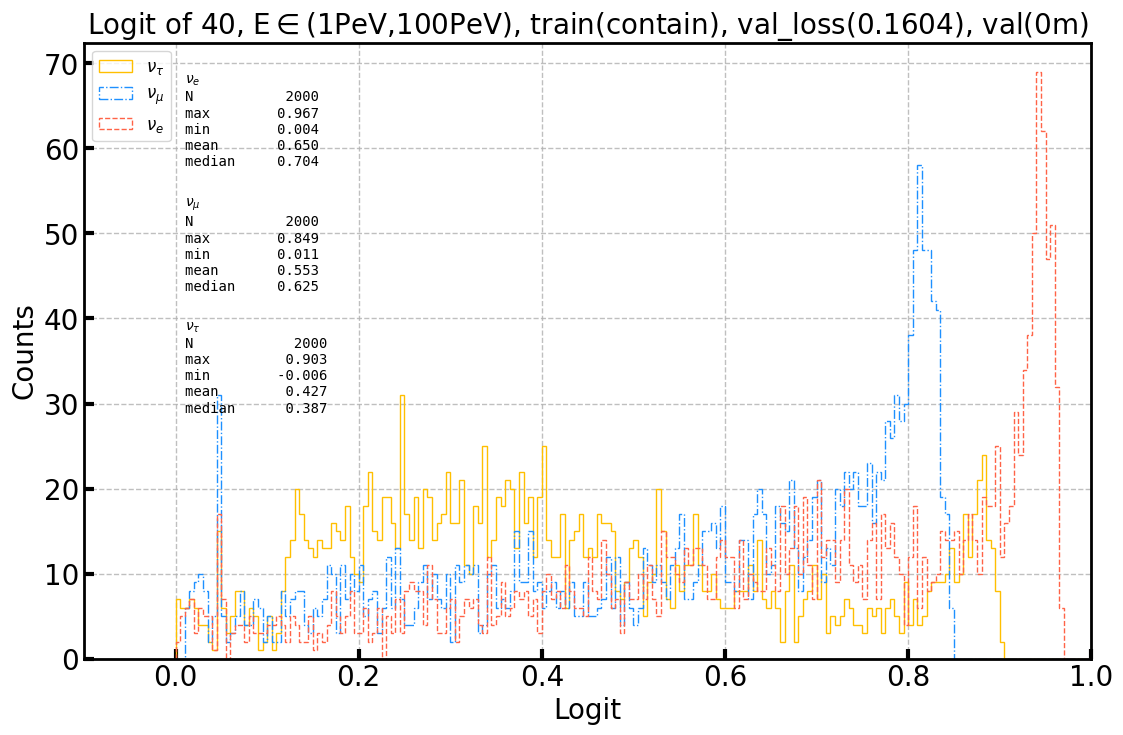

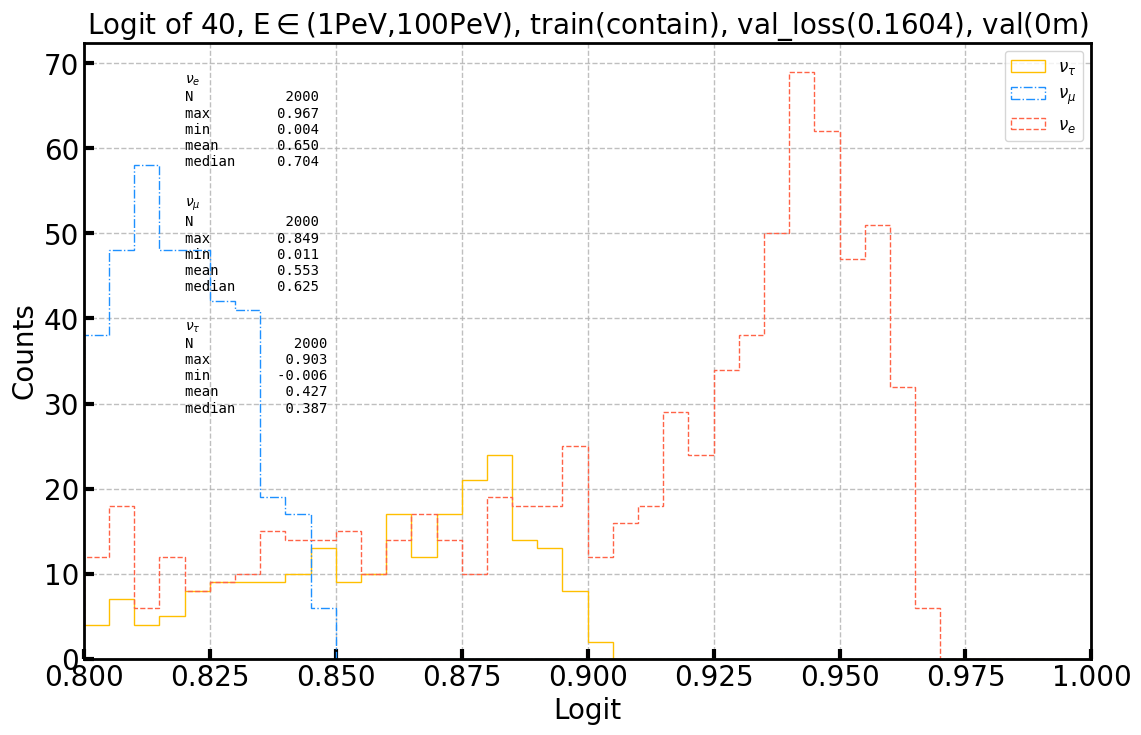

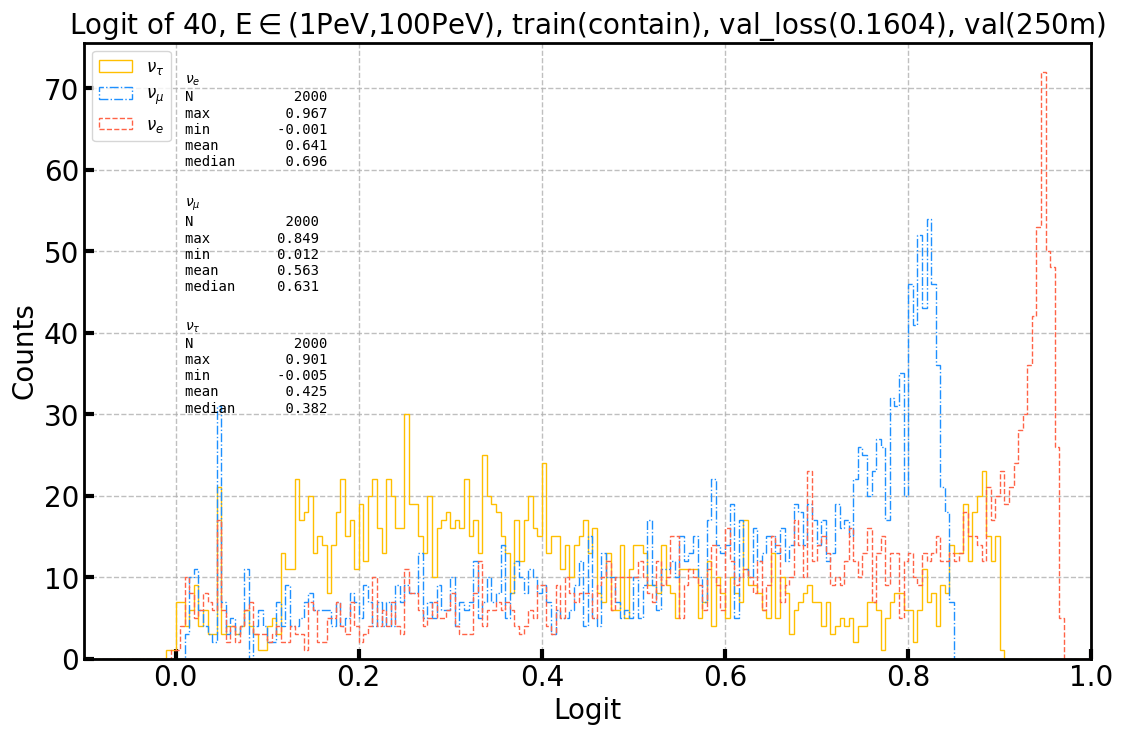

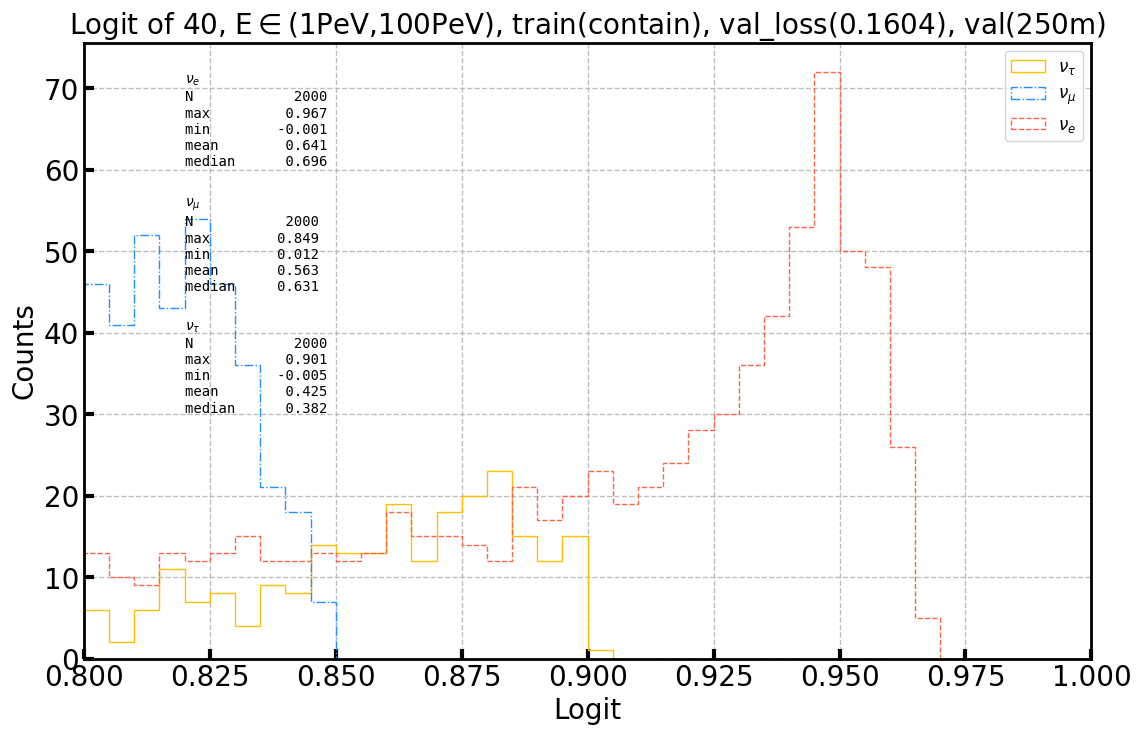

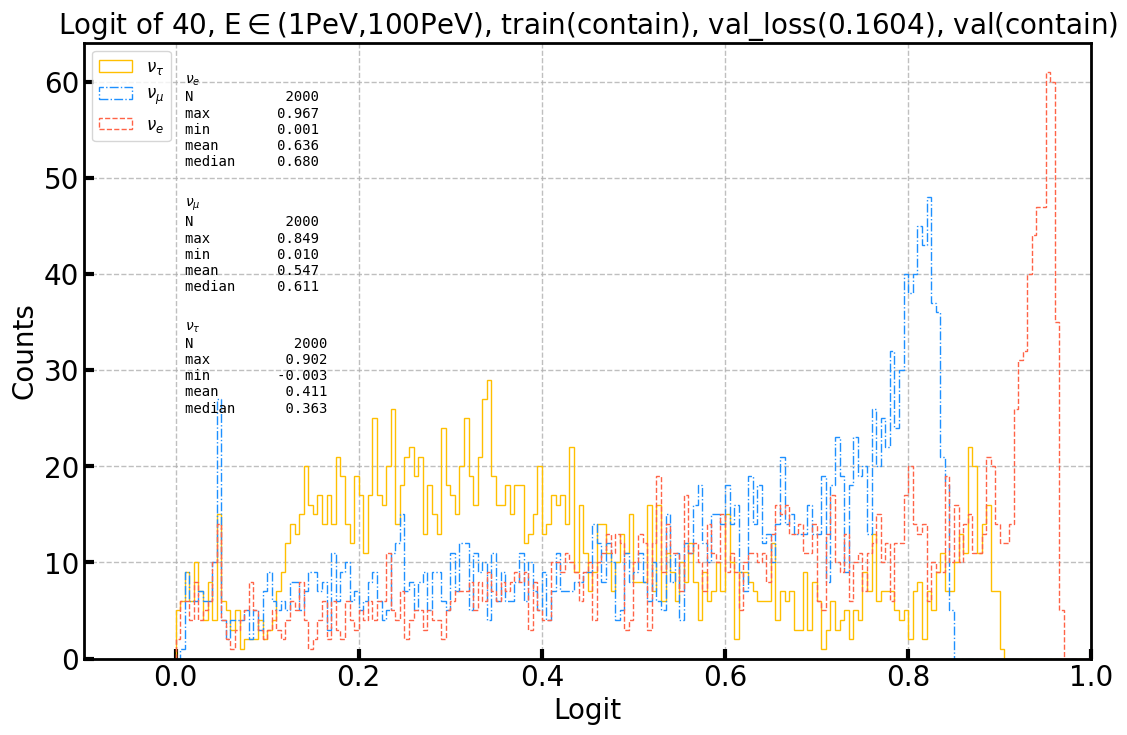

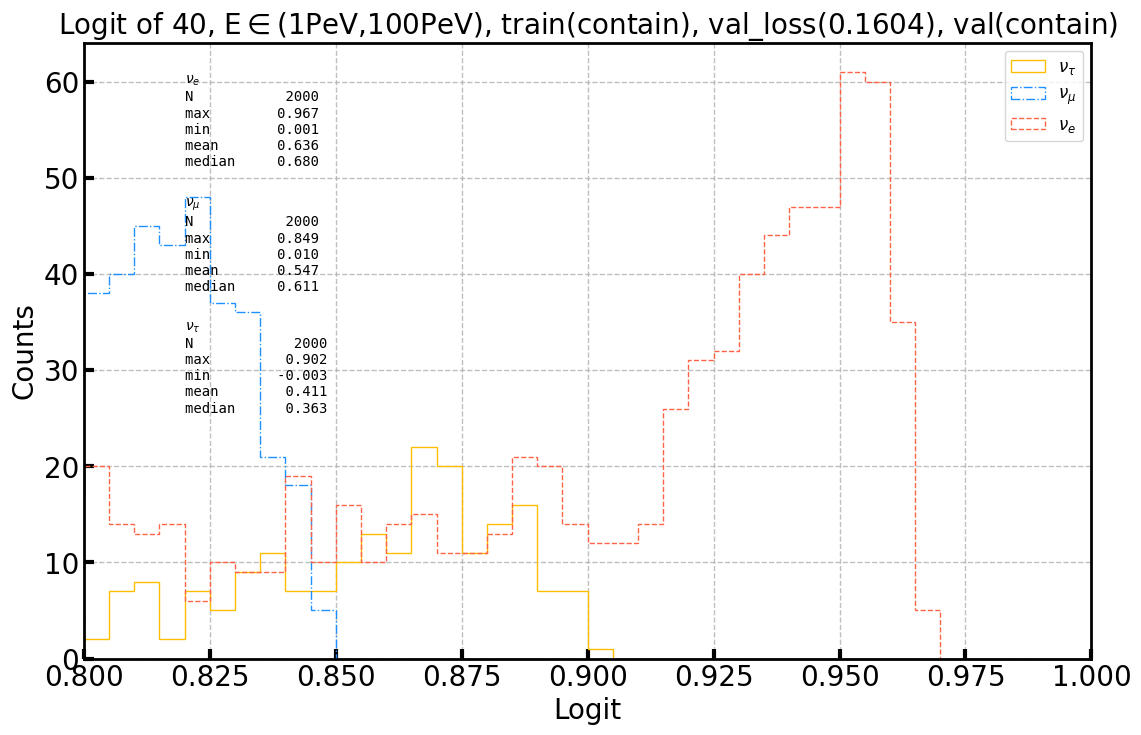

In [55]:
for id, csv in csvs_high.items():
    run_plot(csv, id)

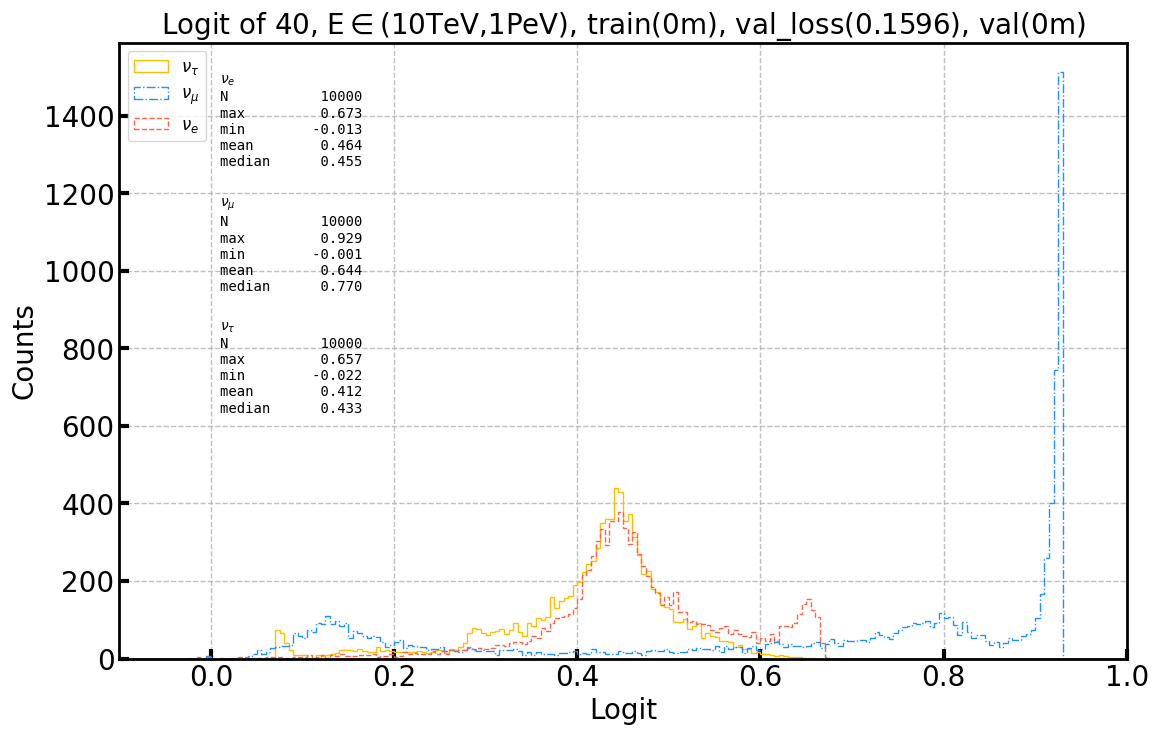

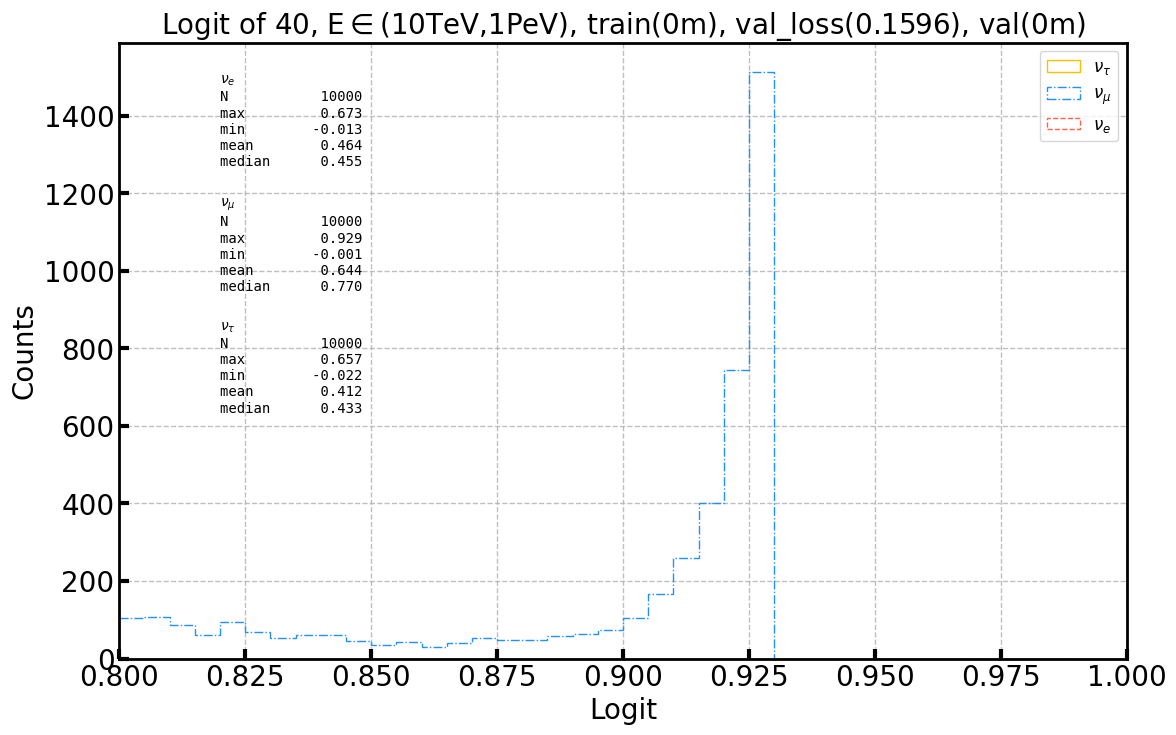

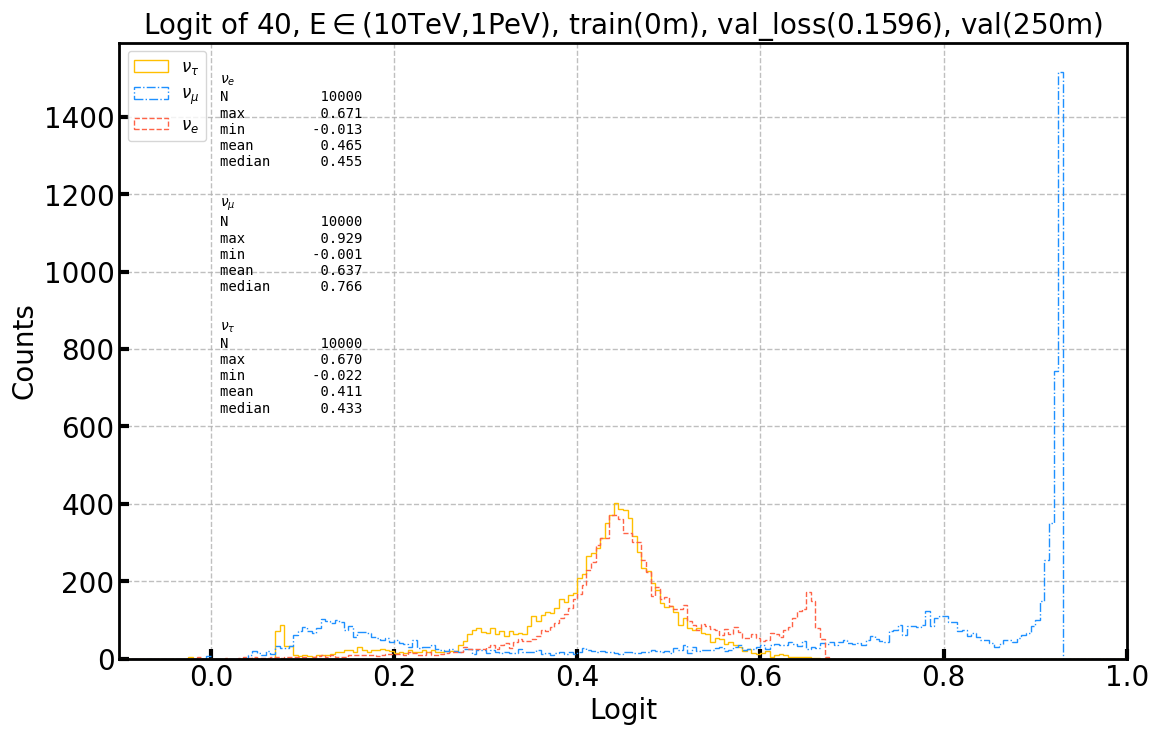

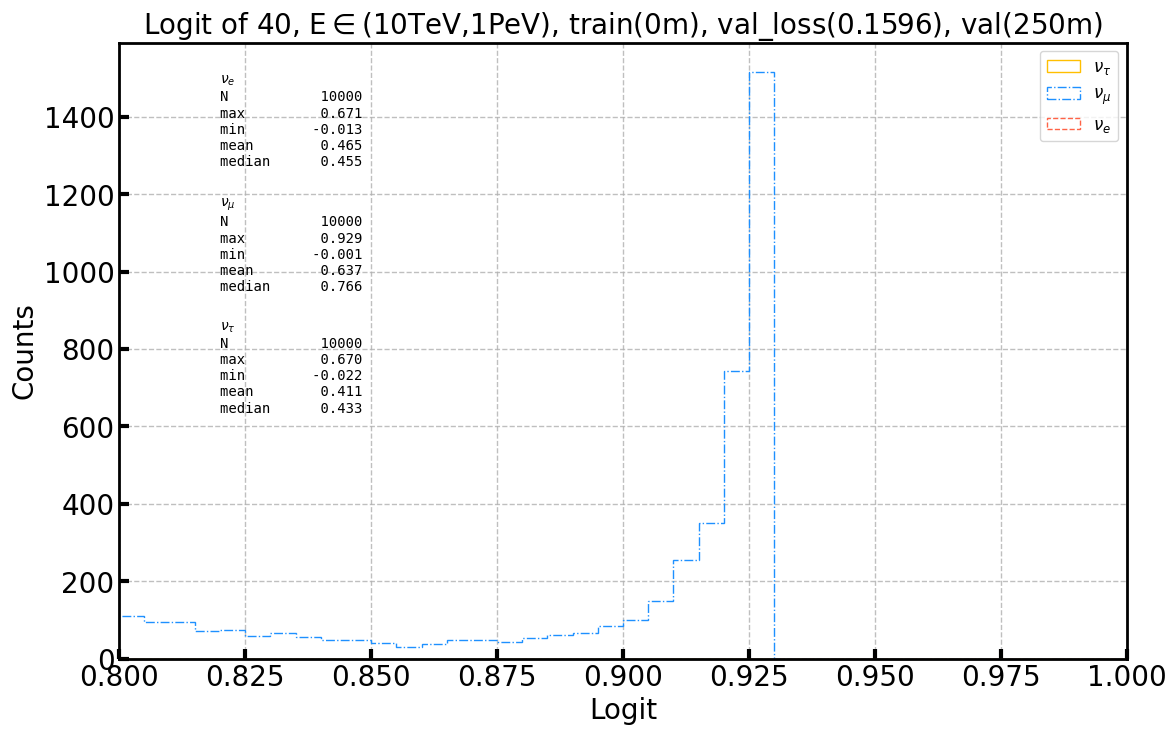

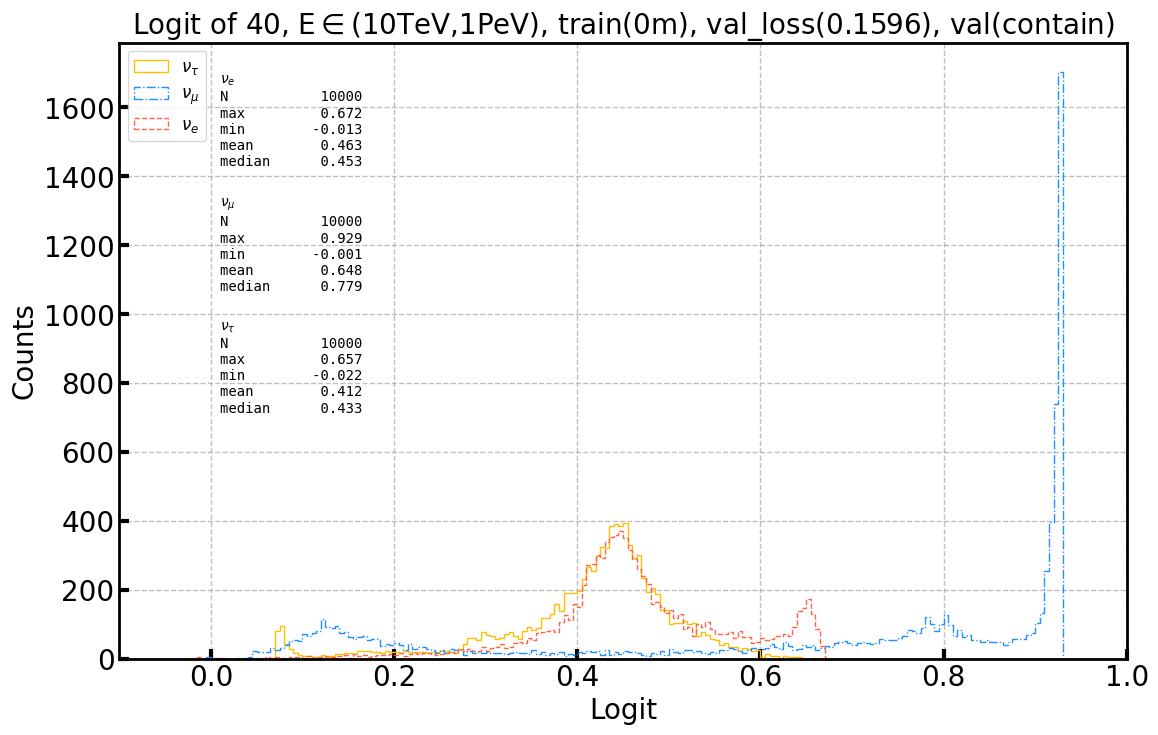

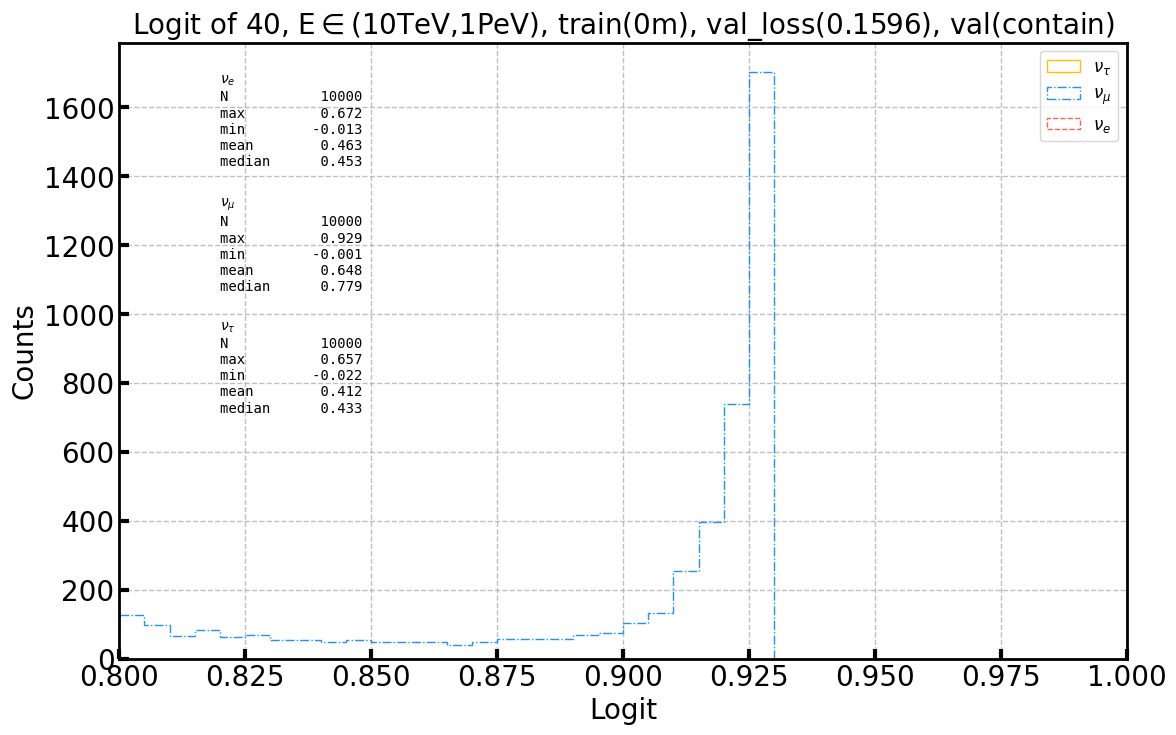

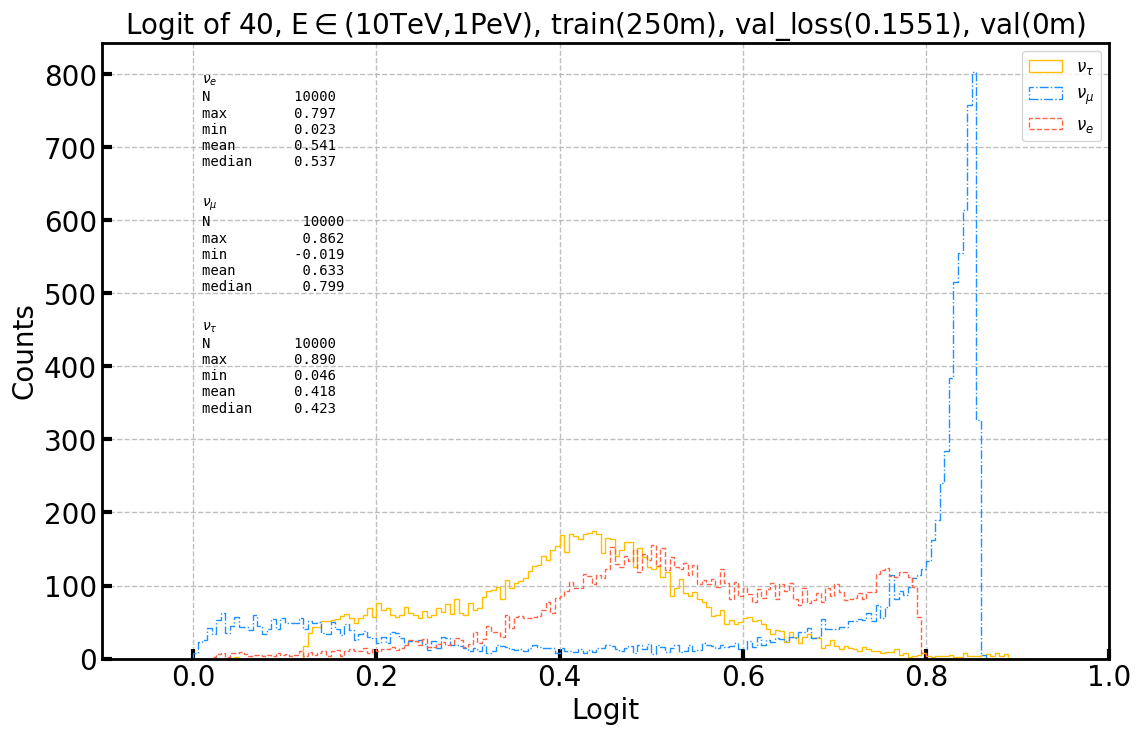

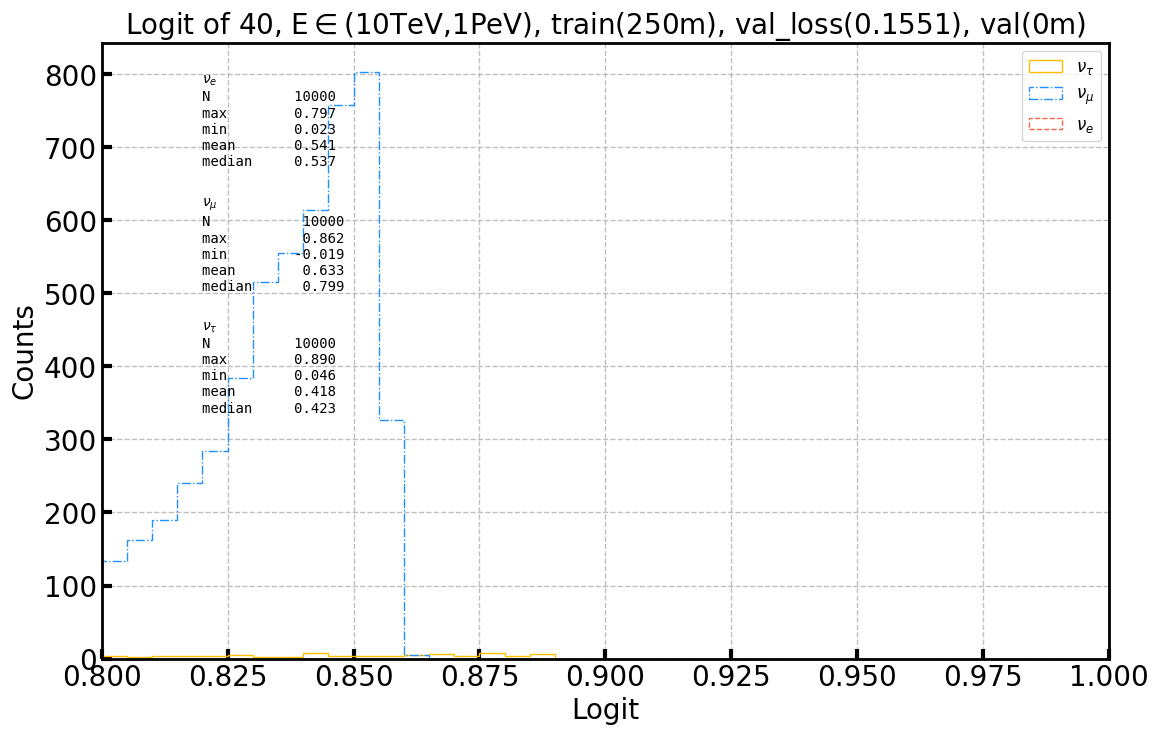

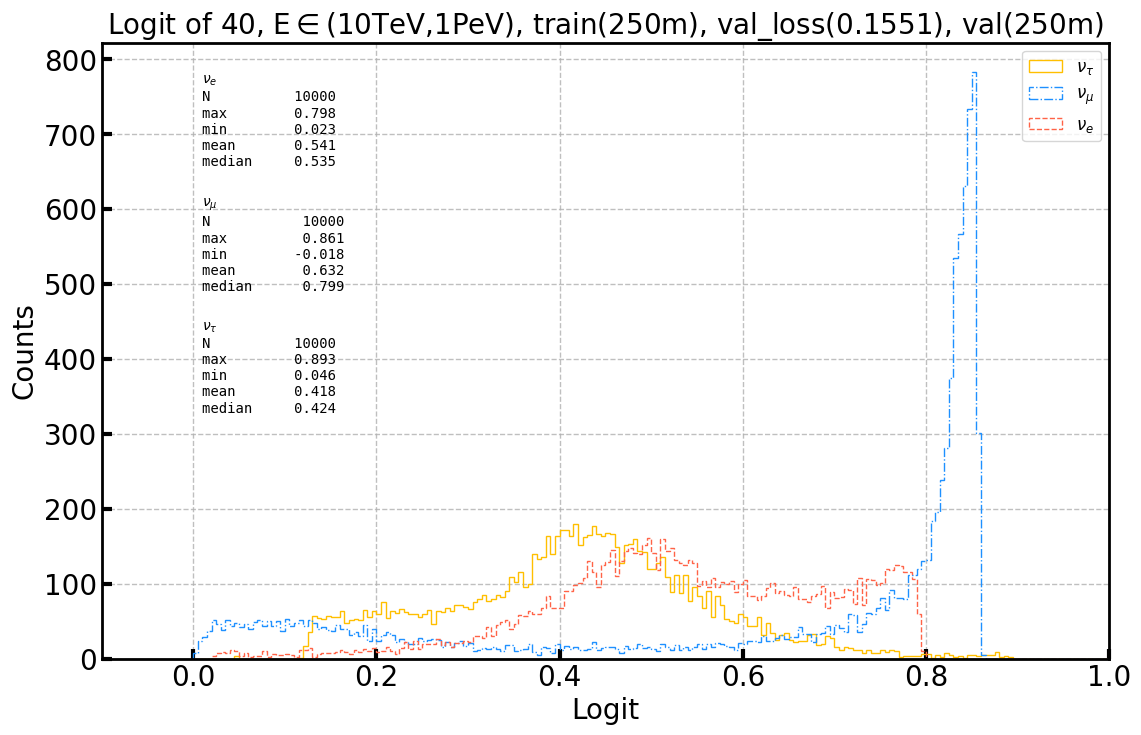

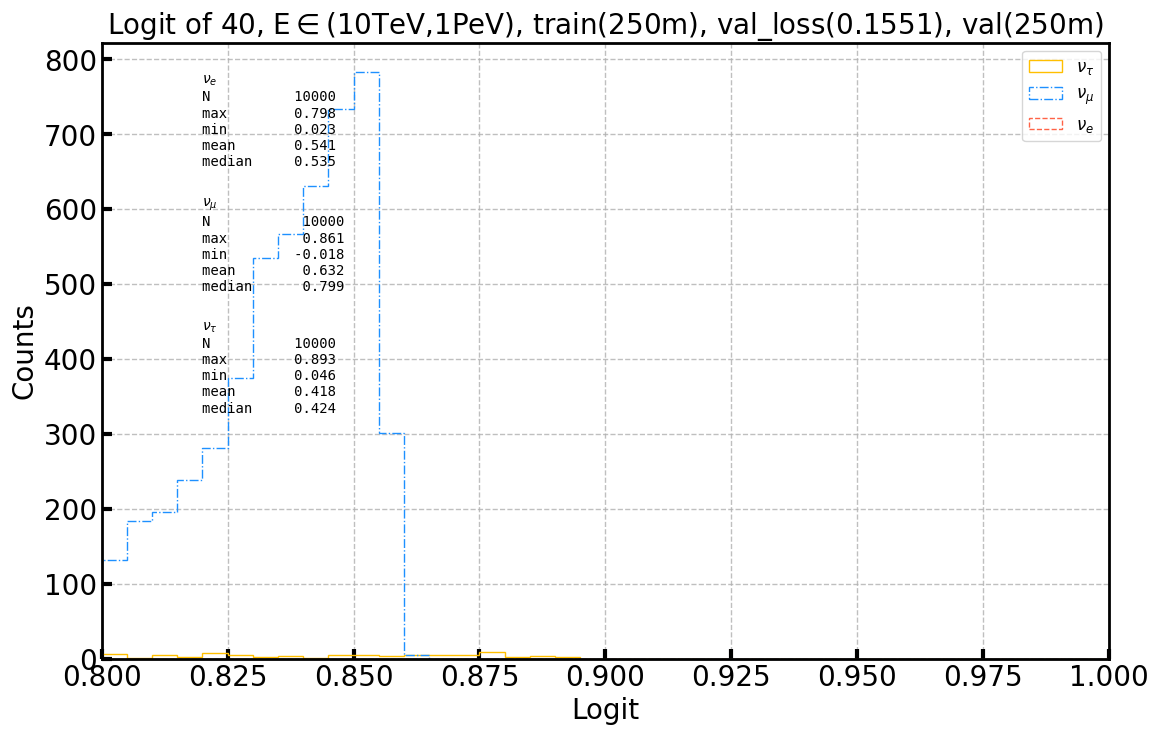

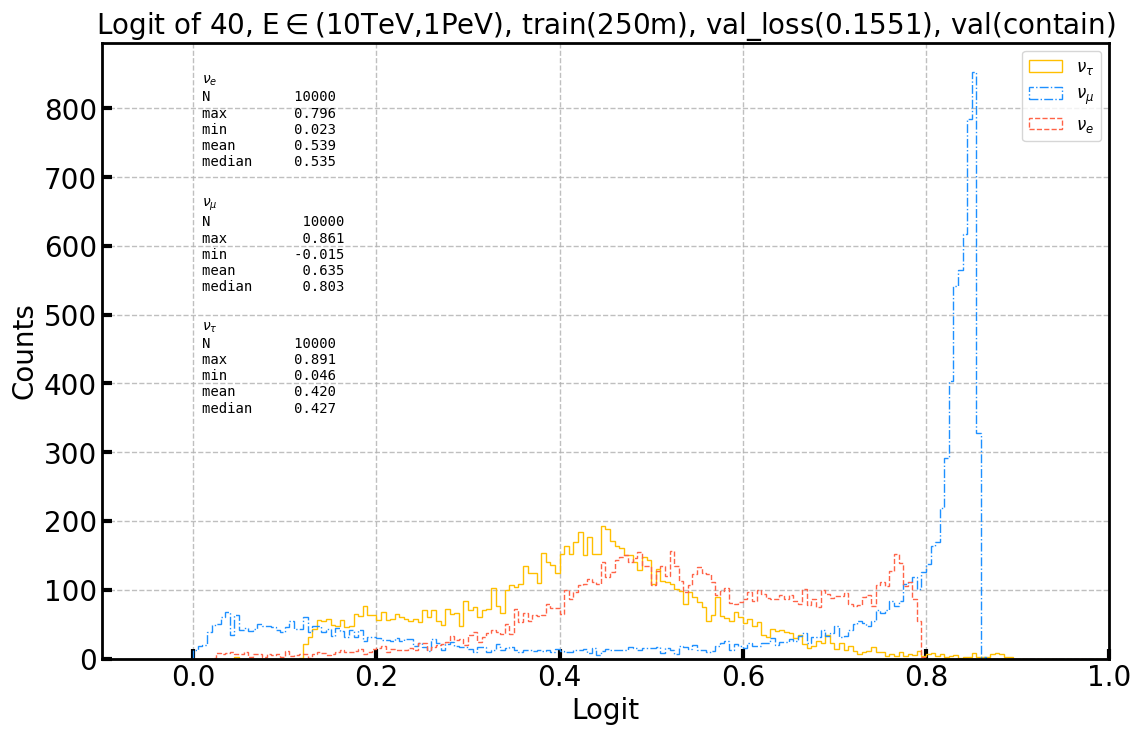

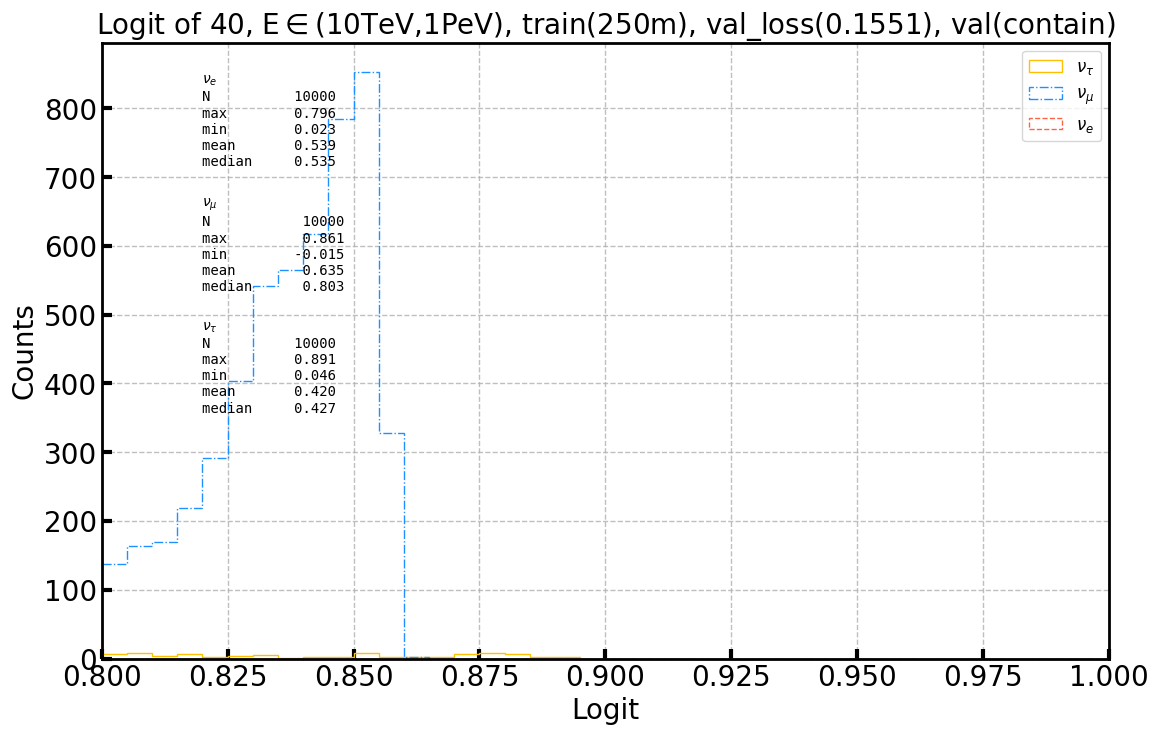

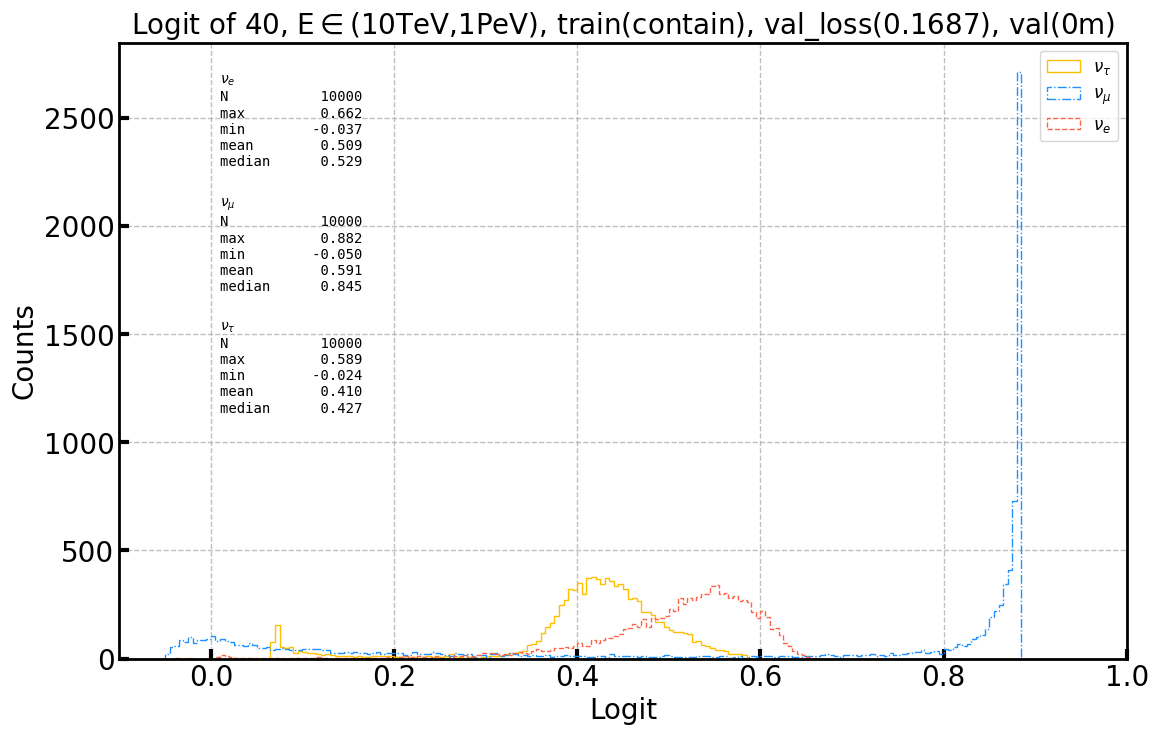

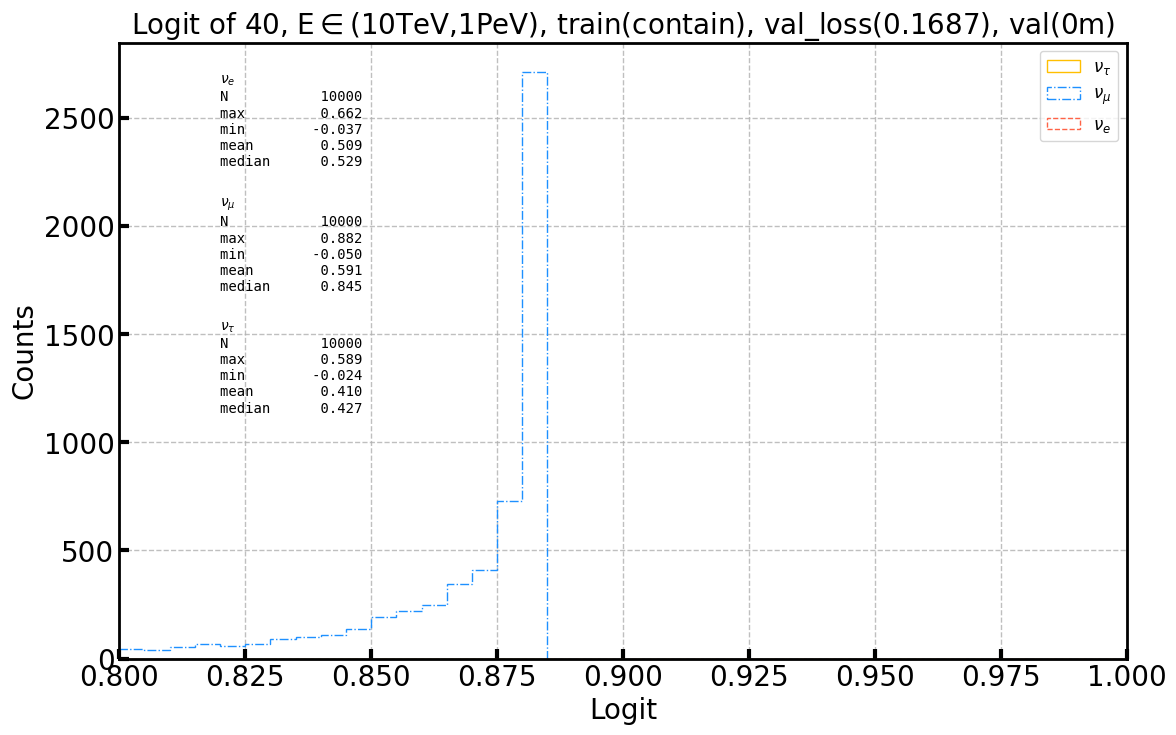

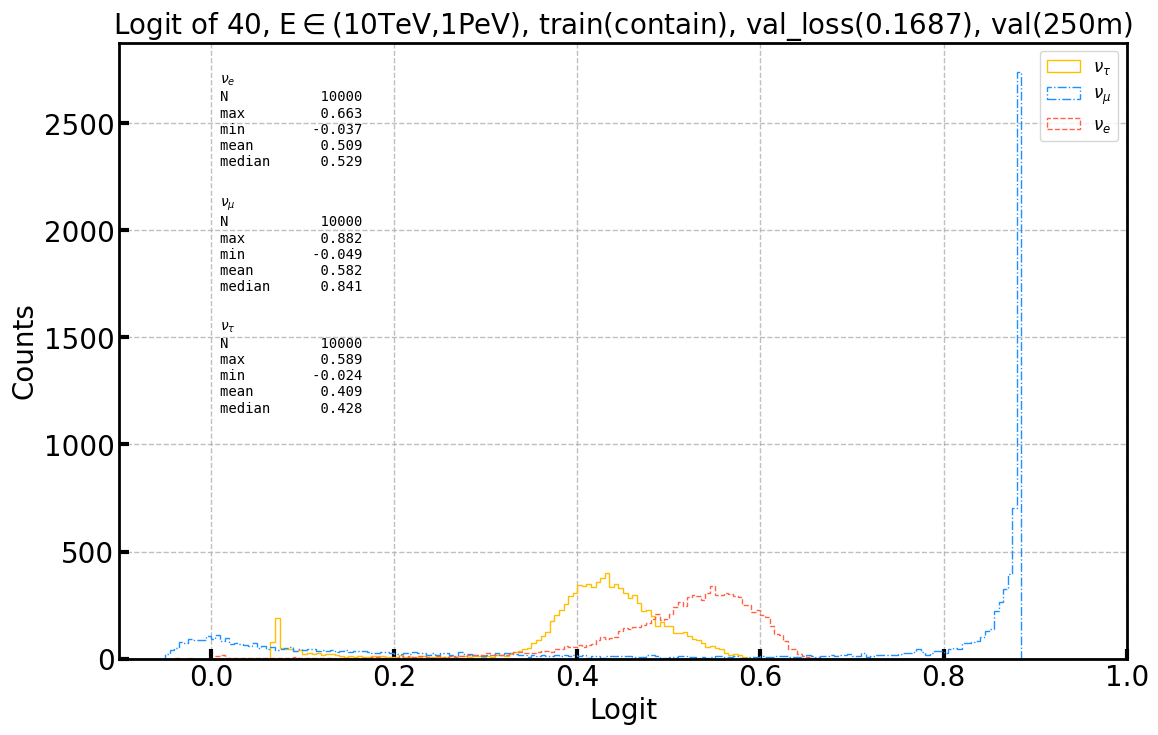

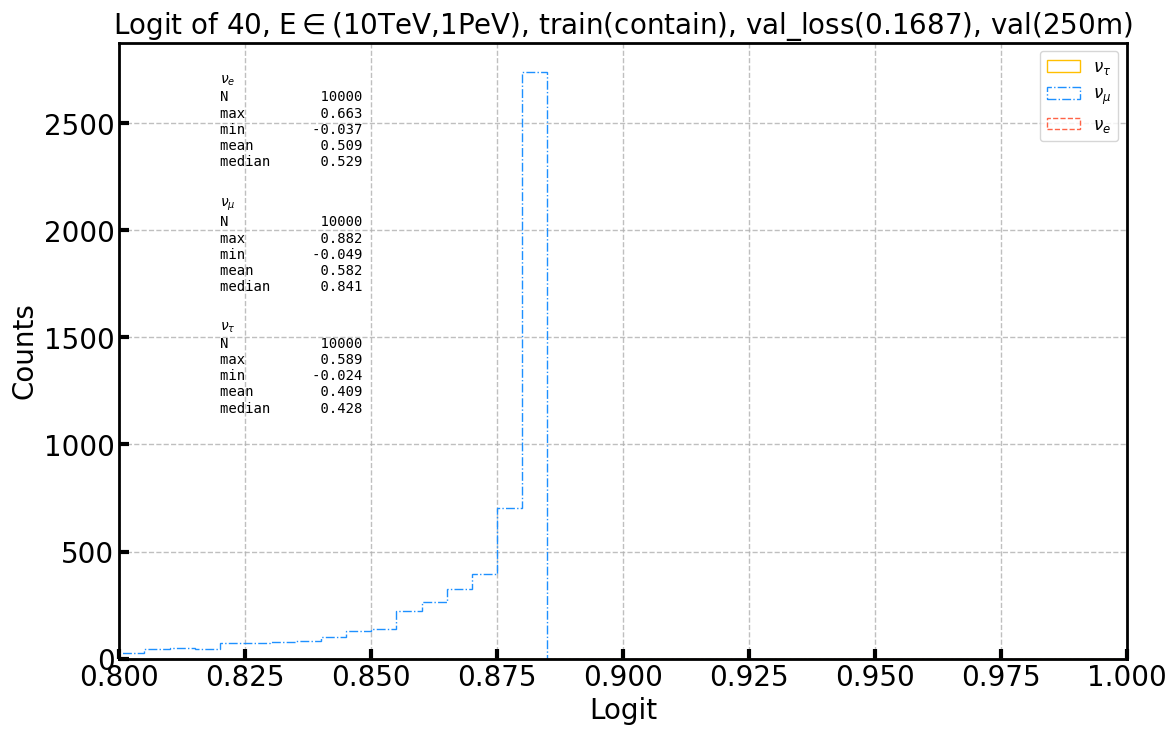

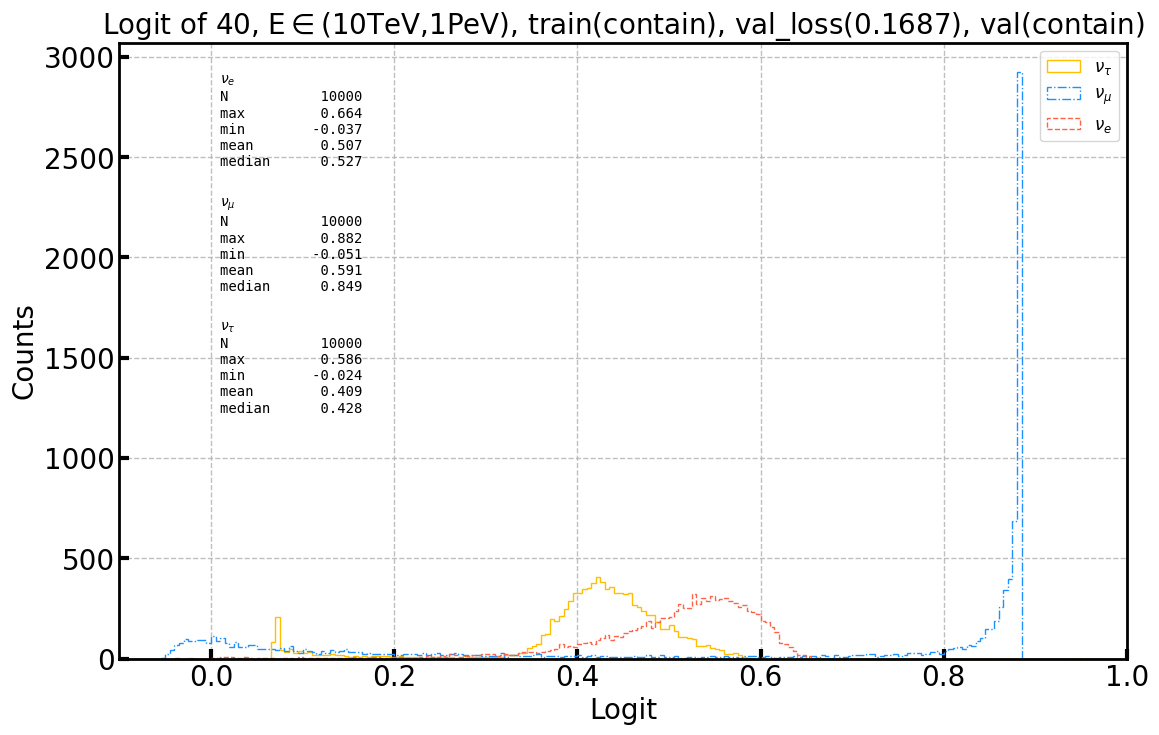

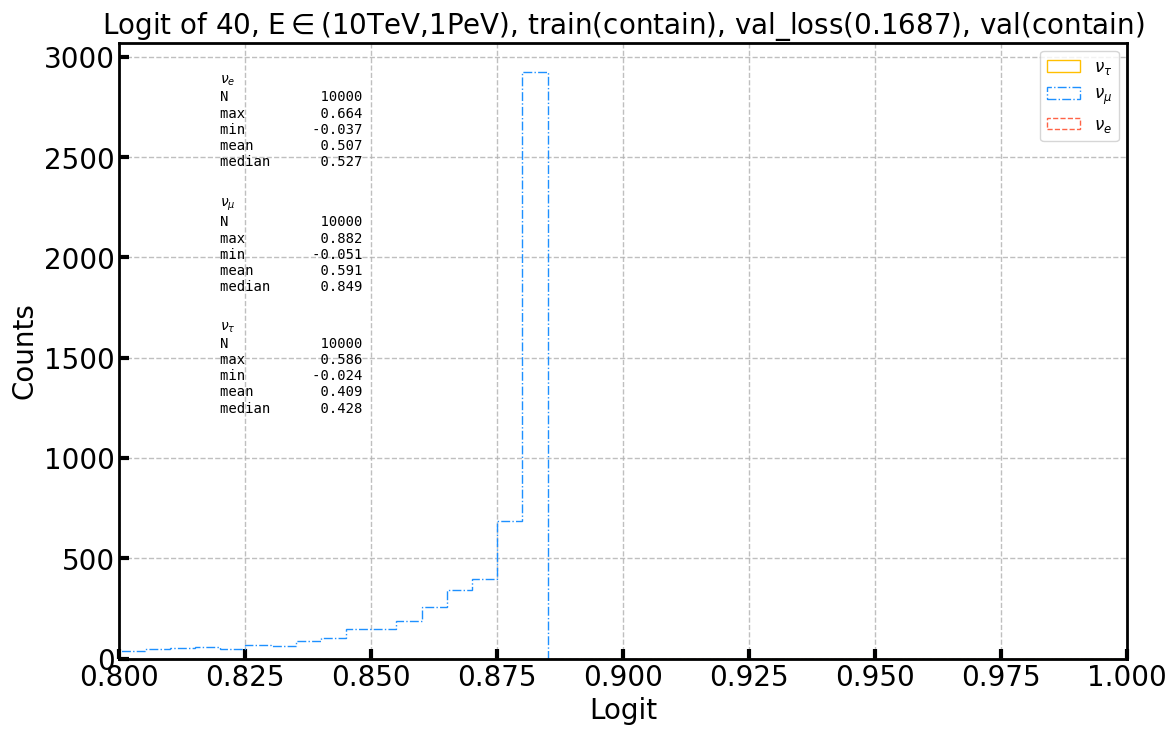

In [56]:
for id, csv in csvs_medium.items():
    run_plot(csv, id)